# Some other features in Bayesian inference

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

Lazy Propagation uses a secondary structure called the "Junction Tree" to perform the inference.

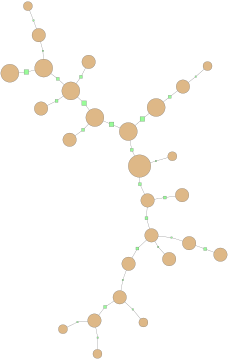

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn=gum.loadBN("res/alarm.dsl")
gnb.showJunctionTreeMap(bn);

But this junction tree can be transformed to build different probabilistic queries.

In [2]:
bn=gum.fastBN("A->B->C->D;A->E->D;F->B;C->H")
ie=gum.LazyPropagation(bn)
bn              

(pyAgrum.BayesNet<double>@0x55570ad56a60) BN{nodes: 7, arcs: 7, domainSize: 128, dim: 16, mem: 256o}

## Evidence impact 
Evidence Impact allows the user to analyze the effect of any variables on any other variables

In [3]:
ie.evidenceImpact("B",["A","H"])

(pyAgrum.Potential<double>@0x55570acd3000) 
             ||  B                |
H     |A     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.4421  | 0.5579  |
1     |0     || 0.3993  | 0.6007  |
0     |1     || 0.5034  | 0.4966  |
1     |1     || 0.4595  | 0.5405  |

Evidence impact is able to find the minimum set of variables which effectively conditions the analyzed variable

In [4]:
ie.evidenceImpact("E",["A","F","B","D"]) # {A,D,B} d-separates E and F

(pyAgrum.Potential<double>@0x555709f033a0) 
                    ||  E                |
D     |B     |A     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.2314  | 0.7686  |
1     |0     |0     || 0.0748  | 0.9252  |
0     |1     |0     || 0.2347  | 0.7653  |
1     |1     |0     || 0.0641  | 0.9359  |
0     |0     |1     || 0.9366  | 0.0634  |
1     |0     |1     || 0.7985  | 0.2015  |
0     |1     |1     || 0.9377  | 0.0623  |
1     |1     |1     || 0.7705  | 0.2295  |

In [5]:
ie.evidenceImpact("E",["A","B","C","D","F"]) # {A,C,D} d-separates E and {B,F}

(pyAgrum.Potential<double>@0x55570a9db140) 
                    ||  E                |
D     |A     |C     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.2197  | 0.7803  |
1     |0     |0     || 0.1093  | 0.8907  |
0     |1     |0     || 0.9325  | 0.0675  |
1     |1     |0     || 0.8575  | 0.1425  |
0     |0     |1     || 0.2432  | 0.7568  |
1     |0     |1     || 0.0338  | 0.9662  |
0     |1     |1     || 0.9403  | 0.0597  |
1     |1     |1     || 0.6318  | 0.3682  |

## Evidence Joint Imapct

In [6]:
ie.evidenceJointImpact(["A","F"],["B","C","D","E","H"]) # {B,E} d-separates [A,F] and [C,D,H]

(pyAgrum.Potential<double>@0x55570a78f6e0) 
                    ||  A                |
F     |B     |E     ||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.1432  | 0.5830  |
1     |0     |0     || 0.0954  | 0.1784  |
0     |1     |0     || 0.2604  | 0.5634  |
1     |1     |0     || 0.0258  | 0.1505  |
0     |0     |1     || 0.5634  | 0.0468  |
1     |0     |1     || 0.3756  | 0.0143  |
0     |1     |1     || 0.8659  | 0.0382  |
1     |1     |1     || 0.0857  | 0.0102  |